# ПРОЕКТ

Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку. 

In [1]:
import pandas as pd

Шаг 1. Откройте таблицу и изучите общую информацию о данных

In [2]:
data = pd.read_csv('d:\\yandexDataScience\\ПРОЕКТ Исследование надёжности заёмщиков\\data.csv')
data.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Шаг 2. Предобработка данных

определите и заполните пропущенные значения:

    опишите, какие пропущенные значения вы обнаружили;
    приведите возможные причины появления пропусков в данных;
    объясните, по какому принципу заполнены пропуски;

In [3]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [4]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [5]:
data.query('children == -1')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля
1363,-1,-1195.264956,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,-1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,-2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,-3045.290443,26,Среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,-901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Возраст клиента в годах

In [7]:
data['dob_years'].unique()
# Есть значения с 0 возрастом

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [8]:
data['dob_years'].value_counts(ascending=True)

75      1
74      6
73      8
19     14
72     33
20     51
71     58
70     65
69     85
68     99
0     101
21    111
67    167
22    183
66    183
65    194
23    254
24    264
64    265
63    269
62    352
61    355
25    357
60    377
26    408
55    443
59    444
51    448
53    459
57    460
58    461
46    475
54    479
47    480
52    484
56    487
27    493
45    497
28    503
49    508
32    510
43    513
50    514
37    537
48    538
30    540
29    545
44    547
36    555
31    560
39    573
33    581
42    597
38    598
34    603
41    607
40    609
35    617
Name: dob_years, dtype: int64

In [9]:
# Семейный статус
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [10]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [12]:
# Смотрим уникальные значения по полу
data['gender'].unique()
# Есть неопределенные значения XNA (всего 1 значение)

array(['F', 'M', 'XNA'], dtype=object)

In [13]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [14]:
#  Приведение значений столбцов к нижнему регистру
data['education'] = data['education'].str.lower()

## Обработка пропусков

In [15]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [16]:
# Проверим значения по столбцу days_employed
# Уберем минусовые значения
data['days_employed'] = data['days_employed'].abs()

In [17]:
# Найдем максимальные и минимальные значения стажа, чтобы предположить в каких единицах (часы, дни и т.д).
max_minute_employed = data['days_employed'].max()
max_minute_employed

401755.40047533

In [18]:
min_minute_employed = data['days_employed'].min()
min_minute_employed

24.14163324048118

In [19]:
mean_minute_employed = data['days_employed'].mean()
mean_minute_employed

66914.72890682195

In [20]:
# Вероятно значения отражены в часах. Пробуем перевести в года
max_years_employed = max_minute_employed  / 24 /365
# Максимальный стаж = 45 годам.
max_years_employed

45.8624886387363

In [21]:
#  Попробуем найти этого человека, чтобы убедиться действительно ли это может быть
data.query('days_employed == 401755.40047533')
# Человек с указанным стажем является пенсионером, вполне реально что его стаж = 45 годам.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


In [22]:
# Заполнил пустые значения days_employed = 0. Можно было заполнить средним mean_minute_employed.

data['days_employed'] = data['days_employed'].fillna('0').astype('int')

In [23]:
# переведем часы в дни по столбцу days_employed

data['years_employed'] = data['days_employed'] / 24 / 365

In [24]:
# Заполнил пустые значения days_employed

data.isna().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
years_employed         0
dtype: int64

In [25]:
import numpy as np

In [26]:
# Пытаемся разобраться с пустыми значениями в total_income

In [27]:
data['total_income'].value_counts(dropna=False)

NaN              2174
133912.272223       1
182036.676828       1
122421.963500       1
198271.837248       1
                 ... 
133299.194693       1
115080.782380       1
84896.781597        1
153838.839212       1
220857.484722       1
Name: total_income, Length: 19352, dtype: int64

In [28]:
data.query("total_income == 'NaN'")

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
12,0,0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу,0.0
26,0,0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование,0.0
29,0,0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости,0.0
41,0,0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем,0.0
55,0,0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,0,47,среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем,0.0
21495,1,0,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба,0.0
21497,0,0,48,высшее,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости,0.0
21502,1,0,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости,0.0


In [29]:
# Подставлять средние или медианные значения неправильно, 
# так как это повысит шанс получения кредита, но не повысит качество данных

data['total_income'] = data['total_income'].fillna('0').astype('int')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  int32  
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
 12  years_employed    21525 non-null  float64
dtypes: float64(1), int32(2), int64(5), object(5)
memory usage: 2.0+ MB


In [31]:
# Сейчас пустых значений не осталось
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
dtype: int64

In [32]:
# Изменим значение в столбце children c -1 on 1 and 20 on 0
data.loc[data['children'] == -1, 'children'] = 1
data.loc[data['children'] == 20, 'children'] = 0

In [33]:
# Изменим нулевой возраст клиента на средний. Сначала рассчитаем его

In [34]:
mean_dob_years = round(data['dob_years'].mean())
mean_dob_years

43

In [35]:
data.loc[data['dob_years'] == 0, 'dob_years'] = mean_dob_years

In [36]:
data.dob_years.unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75], dtype=int64)

In [37]:
# Определить какого пола человек не удается
data.query("gender == 'XNA'")

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,0.269178


In [38]:
# Проверим дубли
data.duplicated().sum()

71

In [39]:
# Удаляем дубли
data = data.drop_duplicates().reset_index(drop=True)

In [40]:
data.duplicated().sum()

0

## Замена типа данных

In [41]:
# Проверим теперь типы данных
# Необходимости изменения типов данных нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  int32  
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  int32  
 11  purpose           21454 non-null  object 
 12  years_employed    21454 non-null  float64
dtypes: float64(1), int32(2), int64(5), object(5)
memory usage: 2.0+ MB


In [42]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,0.963128
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,0.459361
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,0.641895
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,0.470776
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38.843151


## выделите леммы в значениях столбца с целями получения кредита: 

In [43]:
data.purpose.value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [44]:
lemma = data['purpose'].unique().tolist()

In [45]:
lemma

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [46]:
from pymystem3 import Mystem
from collections import Counter

In [47]:
m = Mystem()

In [48]:
string_lemma = ', '.join(lemma)

In [49]:
string_lemma

'покупка жилья, приобретение автомобиля, дополнительное образование, сыграть свадьбу, операции с жильем, образование, на проведение свадьбы, покупка жилья для семьи, покупка недвижимости, покупка коммерческой недвижимости, покупка жилой недвижимости, строительство собственной недвижимости, недвижимость, строительство недвижимости, на покупку подержанного автомобиля, на покупку своего автомобиля, операции с коммерческой недвижимостью, строительство жилой недвижимости, жилье, операции со своей недвижимостью, автомобили, заняться образованием, сделка с подержанным автомобилем, получение образования, автомобиль, свадьба, получение дополнительного образования, покупка своего жилья, операции с недвижимостью, получение высшего образования, свой автомобиль, сделка с автомобилем, профильное образование, высшее образование, покупка жилья для сдачи, на покупку автомобиля, ремонт жилью, заняться высшим образованием'

In [50]:
lemmas = m.lemmatize(string_lemma)

In [51]:
print(lemmas)

['покупка', ' ', 'жилье', ', ', 'приобретение', ' ', 'автомобиль', ', ', 'дополнительный', ' ', 'образование', ', ', 'сыграть', ' ', 'свадьба', ', ', 'операция', ' ', 'с', ' ', 'жилье', ', ', 'образование', ', ', 'на', ' ', 'проведение', ' ', 'свадьба', ', ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', ', ', 'покупка', ' ', 'недвижимость', ', ', 'покупка', ' ', 'коммерческий', ' ', 'недвижимость', ', ', 'покупка', ' ', 'жилой', ' ', 'недвижимость', ', ', 'строительство', ' ', 'собственный', ' ', 'недвижимость', ', ', 'недвижимость', ', ', 'строительство', ' ', 'недвижимость', ', ', 'на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', ', ', 'на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', ', ', 'операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', ', ', 'строительство', ' ', 'жилой', ' ', 'недвижимость', ', ', 'жилье', ', ', 'операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', ', ', 'автомобиль', ', ', 'заниматься', ' ', 'образование', ', ', 'сделка', ' '

In [52]:
print(Counter(lemmas))

Counter({' ': 59, ', ': 37, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


## Категоризируем данные:

Напишем функцию, которая будет относить цель получения кредита к одной из четырех категорий (недвижимость, автомобиль, образование, свадьба)

In [53]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,0.963128
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,0.459361
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,0.641895
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,0.470776
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38.843151


In [57]:
lemmas = {}
purposes = data['purpose'].unique()
for purpose in purposes:
#     print(purpose)
    lemmas[purpose] = m.lemmatize(purpose)[::2]
# print(lemmas)    

In [55]:
string_lemmas = m.lemmatize(" ".join(data['purpose'].values))
string_lemmas

['покупка',
 ' ',
 'жилье',
 ' ',
 'приобретение',
 ' ',
 'автомобиль',
 ' ',
 'покупка',
 ' ',
 'жилье',
 ' ',
 'дополнительный',
 ' ',
 'образование',
 ' ',
 'сыграть',
 ' ',
 'свадьба',
 ' ',
 'покупка',
 ' ',
 'жилье',
 ' ',
 'операция',
 ' ',
 'с',
 ' ',
 'жилье',
 ' ',
 'образование',
 ' ',
 'на',
 ' ',
 'проведение',
 ' ',
 'свадьба',
 ' ',
 'покупка',
 ' ',
 'жилье',
 ' ',
 'для',
 ' ',
 'семья',
 ' ',
 'покупка',
 ' ',
 'недвижимость',
 ' ',
 'покупка',
 ' ',
 'коммерческий',
 ' ',
 'недвижимость',
 ' ',
 'сыграть',
 ' ',
 'свадьба',
 ' ',
 'приобретение',
 ' ',
 'автомобиль',
 ' ',
 'покупка',
 ' ',
 'жилой',
 ' ',
 'недвижимость',
 ' ',
 'строительство',
 ' ',
 'собственный',
 ' ',
 'недвижимость',
 ' ',
 'недвижимость',
 ' ',
 'строительство',
 ' ',
 'недвижимость',
 ' ',
 'на',
 ' ',
 'покупка',
 ' ',
 'подержать',
 ' ',
 'автомобиль',
 ' ',
 'на',
 ' ',
 'покупка',
 ' ',
 'свой',
 ' ',
 'автомобиль',
 ' ',
 'недвижимость',
 ' ',
 'приобретение',
 ' ',
 'автомобиль',
 ' ',

In [59]:
lemmas_counter = Counter(string_lemmas)
lemmas_counter

Counter({'покупка': 5897,
         ' ': 55023,
         'жилье': 4460,
         'приобретение': 461,
         'автомобиль': 4306,
         'дополнительный': 906,
         'образование': 4013,
         'сыграть': 765,
         'свадьба': 2324,
         'операция': 2604,
         'с': 2918,
         'на': 2222,
         'проведение': 768,
         'для': 1289,
         'семья': 638,
         'недвижимость': 6351,
         'коммерческий': 1311,
         'жилой': 1230,
         'строительство': 1878,
         'собственный': 635,
         'подержать': 853,
         'свой': 2230,
         'со': 627,
         'заниматься': 904,
         'сделка': 941,
         'получение': 1314,
         'высокий': 1374,
         'подержанный': 111,
         'профильный': 436,
         'сдача': 651,
         'ремонт': 607,
         '\n': 1})

In [60]:
def get_type_of_purpose(purpose):
    
    for word in lemmas[purpose]:
        
        if 'недвижимость' in word:
            return 'Приобретение жилья'     
        if 'жилье' in word:
            return 'Приобретение жилья'
        if 'автомобиль' in word:
            return 'Приобретение автомобиля'
        if 'образование' in word:
            return 'Образование'
        if 'свадьба' in word:
            return 'Свадьба'

In [61]:
data['type_of_purpose'] = data['purpose'].apply(get_type_of_purpose)

In [62]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,type_of_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,0.963128,Приобретение жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,0.459361,Приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,0.641895,Приобретение жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,0.470776,Образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38.843151,Свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,0.105708,Приобретение жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,0.328653,Приобретение жилья
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0.017352,Образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,0.790982,Свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,0.249772,Приобретение жилья


In [63]:
# Категоризируем людей по доходам(столбец total_income)
# Градация разделения по доходам (>40000 - низкий доход, средний доход = mean_total_income, выше среднего = до 200000, высокий - свыше 200000) )

In [64]:
mean_total_income = data['total_income'].mean()
mean_total_income

151010.50083900438

In [65]:
def income_rate(total_income):

    if total_income < 40000:
        return 'Низкий доход'
    if 40000 < total_income < mean_total_income:
        return 'Cредний доход'
    if  mean_total_income < total_income < 200000:
        return 'Выше среднего'
    else:
        return 'Высокий доход'

In [66]:
data['income_rate'] = data['total_income'].apply(income_rate)

In [67]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,type_of_purpose,income_rate
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,0.963128,Приобретение жилья,Высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,0.459361,Приобретение автомобиля,Cредний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,0.641895,Приобретение жилья,Cредний доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,0.470776,Образование,Высокий доход
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38.843151,Свадьба,Выше среднего
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,0.517009,Приобретение жилья,Высокий доход
21450,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,39.262215,Приобретение автомобиля,Выше среднего
21451,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,0.241210,Приобретение жилья,Cредний доход
21452,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,0.355251,Приобретение автомобиля,Высокий доход


### Шаг 3. Ответьте на вопросы

#### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [68]:
data_p_count = data.pivot_table(index='children', values='debt', aggfunc='count')
data_p_count

,debt
children,
0,14167
1,4855
2,2052
3,330
4,41
5,9


In [69]:
data_p_sum = data.pivot_table(index='children', values='debt', aggfunc='sum')
data_p_sum

,debt
children,
0,1071
1,445
2,194
3,27
4,4
5,0


In [70]:
data_p_ratio = data_p_sum / data_p_count
data_p_ratio

,debt
children,
0,0.075598
1,0.091658
2,0.094542
3,0.081818
4,0.097561
5,0.000000


In [71]:
data_p_child = data.pivot_table(index='children', values='debt')
round(data_p_child * 100, 1)
# Из полученных данных можно увидеть, что кредиторы не имеющие детей погашают кредить чаще, чем те кто имеет 1 или более детей. 
# Возможно сказывается то, что у этих кредиторов нет дополнительных трат на детей.

,debt
children,
0,7.6
1,9.2
2,9.5
3,8.2
4,9.8
5,0.0


#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [72]:
data_p_family_status = data.pivot_table(index='family_status', values='debt')
round(data_p_family_status.sort_values('debt') * 100, 1)
# Больше всего задолженностей у людей в незамужних/не женатых и состоящих в гражданском браке
# Вдовец/Вдова чаще всех погашают кредит своевременно, после них люди в разводе. Возможно это связано с возвосшей ответсвенностью только на себя. Чаще всех имеют задолжности с погашением кредита не женатые и не замужние.

,debt
family_status,
вдовец / вдова,6.6
в разводе,7.1
женат / замужем,7.5
гражданский брак,9.3
Не женат / не замужем,9.8


#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [73]:
data_p_income_rate = data.pivot_table(index='income_rate', values='debt')
round(data_p_income_rate.sort_values('debt') * 100, 1)
# Люди с высоким доходом  имеют меньше всего задолженностей. А вот люди имеющие выше среднего дохода, наоборот - выплачивают в меньшей степени кредит.

,debt
income_rate,
Высокий доход,7.1
Низкий доход,8.1
Cредний доход,8.4
Выше среднего,8.8


#### Как разные цели кредита влияют на его возврат в срок?

In [74]:
data_p_type_of_purpose = data.pivot_table(index='type_of_purpose', values='debt')
data_p_type_of_purpose.sort_values('debt')
# Чаще всего выплачиваются кредиты взятые на покупку жилья. Реже всего - приобретение автомобиля.

,debt
type_of_purpose,
Приобретение жилья,0.072334
Свадьба,0.080034
Образование,0.092200
Приобретение автомобиля,0.093590


In [76]:
import matplotlib.pyplot as plt

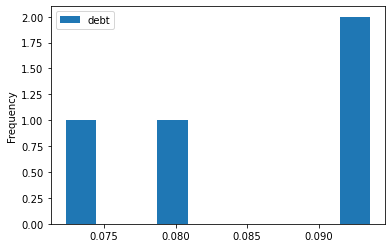

In [75]:
ax = data_p_type_of_purpose.plot.hist()

In [77]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,type_of_purpose,income_rate
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,0.963128,Приобретение жилья,Высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,0.459361,Приобретение автомобиля,Cредний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,0.641895,Приобретение жилья,Cредний доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,0.470776,Образование,Высокий доход
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38.843151,Свадьба,Выше среднего


In [78]:
# Сравнение семейного положения и количества детей с выплатой кредита
data.groupby(['family_status', 'children', ]) \
    .agg({'debt': ['count', 'mean']}) 


debt          
                               count      mean
family_status         children                
Не женат / не замужем 0         2271  0.092911
                      1          454  0.114537
                      2           75  0.120000
                      3            8  0.125000
                      4            2  0.500000
в разводе             0          786  0.071247
                      1          316  0.066456
                      2           81  0.086420
                      3           11  0.090909
                      4            1  0.000000
вдовец / вдова        0          851  0.062280
                      1           81  0.086420
                      2           20  0.150000
                      3            6  0.000000
                      4            1  0.000000
гражданский брак      0         2742  0.084610
                      1         1000  0.118000
                      2          343  0.087464
                      3           56  0.142857
                      4            8  0.000000
                      5            2  0.000000
женат / замужем       0         7517  0.069044
                      1         3004  0.082224
                      2         1533  0.094586
                      3          249  0.068273
                      4           29  0.103448
                      5            7  0.000000

# Вывод

Семейное положение влияет на факт погашения кредита в срок, так же, как и наличие детей.

Люди состоявшие в браке, или состоящие на данный момент, имеют меньше задолжностей перед банком, по сравнении с  холостяками/холостячки. Вероятно семейный брак влияет на более ответсвенное отношение к возврату ден средств.

Идеальный заемщик: 

Многодетный или не имеющий детей одинокий/одинокая (вдова/вдовец или в разводе) человек с высоким уровнем дохода, берущий кредит на покупку жилья или свадьбу.

Худший заемщик:

Человек, у которого от 1 до 4-х детей, живущий в гражданском браке или не замужем / не женат, со средним доходом. Берёт кредит на автомобиль или образование.